# Flight Tickets Price Predictions

## Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error

le=LabelEncoder()

## Importing DataSets
For now, we are using only the clean dataset, rather than the more complex dataset for which we need to use Time Series Regression instead

In [4]:
dataset=pd.read_csv('flight price/Clean_Dataset.csv')

In [5]:
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Preprocessing

In [8]:
dataset=dataset.drop('Unnamed: 0',axis=1)

In [9]:
dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
dataset.value_counts(subset='flight')

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
G8-107        1
6E-2914       1
SG-9923       1
6E-3211       1
G8-405        1
Name: count, Length: 1561, dtype: int64

In [12]:
dataset['airline']=le.fit_transform(dataset['airline'])
dataset['flight']=le.fit_transform(dataset['flight'])
dataset['source_city']=le.fit_transform(dataset['source_city'])
dataset['departure_time']=le.fit_transform(dataset['departure_time'])
dataset['stops']=le.fit_transform(dataset['stops'])
dataset['arrival_time']=le.fit_transform(dataset['arrival_time'])
dataset['destination_city']=le.fit_transform(dataset['destination_city'])
dataset['class']=le.fit_transform(dataset['class'])

In [13]:
dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


# Model evaluation

In [32]:
lr=LinearRegression()
mlpr=MLPRegressor(hidden_layer_sizes=[9,9,9])

x=dataset.drop('price',axis=1)
y=dataset['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr.fit(x_train,y_train)
mlpr.fit(x_train,y_train)

lr_pred=lr.predict(x_test)
mlpr_pred=mlpr.predict(x_test)

print('Linear Regression RMSE:',np.sqrt(root_mean_squared_error(y_test,lr_pred)))
print('Neural Network RMSE:',np.sqrt(root_mean_squared_error(y_test,mlpr_pred)))

Linear Regression RMSE: 83.7469909002816
Neural Network RMSE: 75.79600302751984


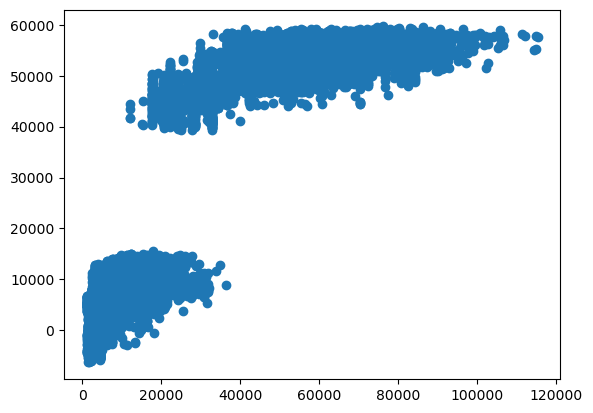

In [33]:
plt.figure()
plt.scatter(y_test,lr_pred)
plt.show()


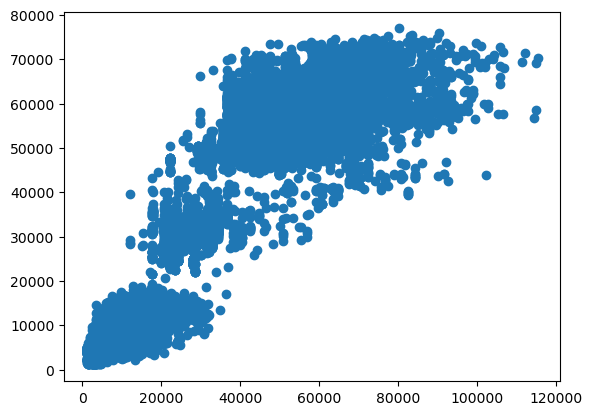

In [34]:
plt.figure()
plt.scatter(y_test,mlpr_pred)
plt.show()

In [35]:
pickle.dump(mlpr, open('trained_model','wb'))